In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [38]:
df = pd.read_csv('dataset_empresas.csv', sep=',')

In [39]:
df

,Empresa,Año,Trimestre,Ingresos,Costos,EBITDA,Deuda,Activos,Capital,Rating,Proyeccion_Crecimiento
0,Alpha Corp,2021,Q1,171958,84578,84520,415838,459178,43340,BB,0.069
1,Alpha Corp,2021,Q2,187337,157320,23591,137498,1112756,975258,BBB,-0.021
2,Alpha Corp,2021,Q3,91090,38121,50200,371879,527069,155190,B,-0.050
3,Alpha Corp,2021,Q4,153355,115049,32921,471909,1189436,717527,BBB,-0.045
4,Alpha Corp,2022,Q1,206730,167170,29711,199503,854811,655308,BBB,0.023
...,...,...,...,...,...,...,...,...,...,...,...
155,Lambda Agro,2023,Q4,339450,172999,153324,365172,1090695,725523,CCC,-0.019
156,Lambda Agro,2024,Q1,246382,208497,29861,300869,941426,640557,BB,-0.029
157,Lambda Agro,2024,Q2,184869,121829,59248,334260,332717,-1543,BBB,-0.025
158,Lambda Agro,2024,Q3,331400,232718,92661,218502,530388,311886,CCC,-0.039


## Margen EBITDA

In [40]:
ebita = df[['Empresa', 'EBITDA']]
ingresos = df[['Empresa', 'Ingresos']]
df_in_ebi = pd.merge(ebita, ingresos, on='Empresa', how='inner')
df_in_ebi['Margen_EBITDA'] = df_in_ebi['EBITDA'] / df_in_ebi['Ingresos']
#sumar todas las empresas con el mismo nombre
df_in_ebi = df_in_ebi.groupby('Empresa').sum().reset_index()
df_in_ebi = df_in_ebi.sort_values(by=['Margen_EBITDA', 'Ingresos'] , ascending=[False, False])
print(df_in_ebi)

          Empresa    EBITDA  Ingresos  Margen_EBITDA
3  Epsilon Retail  21676416  65950784     126.922613
0      Alpha Corp  20172448  55654032     122.692582
2      Delta Tech  17785424  56966656     120.169586
8   Theta Finance  21786672  67451184     112.135075
7     Lambda Agro  23372016  73709680     111.215412
6     Kappa Media  24003424  69533376     106.689484
1      Beta Foods  24862048  82631168     104.754806
4    Gamma Energy  20728320  68407408      91.883688
5  Iota Transport  14774224  58509136      90.359237
9     Zeta Health  15121296  69423280      86.515338


## ROA

In [41]:
ebita = df[['Empresa', 'EBITDA']]
capital = df[['Empresa', 'Capital']]
df_ca_eb = pd.merge(ebita, capital, on='Empresa', how='inner')
df_ca_eb['ROA'] = df_ca_eb['EBITDA'] / df_ca_eb['Capital']
df_ca_eb = df_ca_eb.groupby('Empresa').sum().reset_index()
df_ca_eb = df_ca_eb.sort_values(by='ROA', ascending=False)
print(df_ca_eb)

          Empresa    EBITDA    Capital          ROA
6     Kappa Media  24003424  145441072   130.615126
3  Epsilon Retail  21676416   93269120   102.076037
0      Alpha Corp  20172448  101220032    87.260386
2      Delta Tech  17785424  110028672    57.127912
4    Gamma Energy  20728320  146948624    51.592315
8   Theta Finance  21786672  133266304    47.199936
5  Iota Transport  14774224  144211232     7.823350
1      Beta Foods  24862048  113362496   -96.677881
7     Lambda Agro  23372016  127181056  -882.777924
9     Zeta Health  15121296  176425472 -1669.940431


## RATIO DEUDA/CAPITAL

In [42]:
deuda = df[['Empresa', 'Deuda']]
capital = df[['Empresa', 'Capital']]
df_de_ca = pd.merge(deuda, capital, on='Empresa', how='inner')
df_de_ca['RATIO'] = df_de_ca['Deuda'] / df_de_ca['Capital']
df_de_ca = df_de_ca.groupby('Empresa').sum().reset_index()
df_de_ca = df_de_ca.sort_values(by=['RATIO', 'Deuda', 'Capital'], ascending=False)
print(df_de_ca)

          Empresa     Deuda    Capital        RATIO
6     Kappa Media  83609008  145441072   454.960139
3  Epsilon Retail  90098688   93269120   424.282179
0      Alpha Corp  91676928  101220032   396.568833
2      Delta Tech  77122032  110028672   247.720866
4    Gamma Energy  83610208  146948624   208.103899
8   Theta Finance  82803648  133266304   179.390724
5  Iota Transport  77023072  144211232    40.785795
1      Beta Foods  81204064  113362496  -315.767906
7     Lambda Agro  89641888  127181056 -3385.838851
9     Zeta Health  71790944  176425472 -7928.328361


## EMPRESAS Q4 EN 2024 MEJOR PROYECTADAS

In [50]:
# Filtro de año y trimestre
anio_2024 = df['Año'] == 2024
q4 = df['Trimestre'] == 'Q4'

# Subconjunto 2024 Q4
df_2024_q4 = df[(anio_2024) & (q4)]

analisis_financiero = [df_2024_q4, df_in_ebi, df_ca_eb, df_de_ca]
df_final = reduce(lambda left, right: pd.merge(left, right, on='Empresa', how='inner'), analisis_financiero)
df_final = df_final.sort_values(by=['Margen_EBITDA', 'ROA', 'RATIO'], ascending=[False, False, False])
df_final = df_final[['Empresa', 'Año', 'Trimestre', 'Ingresos_y', 'EBITDA', 'Capital', 'Deuda_y', 'Margen_EBITDA', 'ROA', 'RATIO']]
print(df_final.head(3))

          Empresa   Año Trimestre  Ingresos_y    EBITDA    Capital   Deuda_y  \
4  Epsilon Retail  2024        Q4    65950784  21676416   93269120  90098688   
0      Alpha Corp  2024        Q4    55654032  20172448  101220032  91676928   
3      Delta Tech  2024        Q4    56966656  17785424  110028672  77122032   

   Margen_EBITDA         ROA       RATIO  
4     126.922613  102.076037  424.282179  
0     122.692582   87.260386  396.568833  
3     120.169586   57.127912  247.720866  


Tenemos que las tres mejores empresas en el 4rto trimestre del 2024 fueron; 
1. Epsilon Retail
2. Alpha Corp
3. Delta Tech


---

## TENDENCIAS

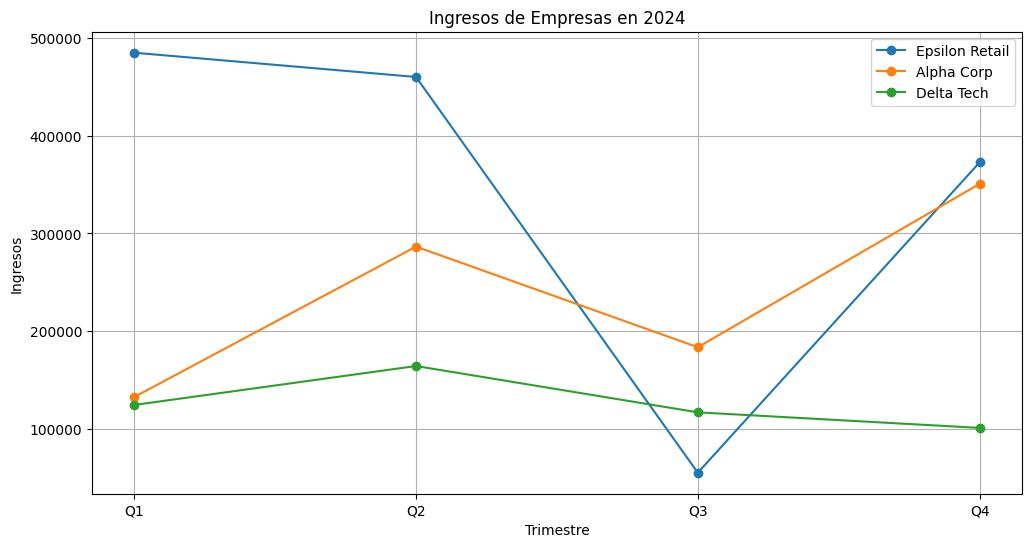

In [55]:
# usar todo 2024 para las 3 empresas
Epsilon_2024 = df[(df['Empresa'] == 'Epsilon Retail') & (df['Año'] == 2024)]
Alpha_2024 = df[(df['Empresa'] == 'Alpha Corp') & (df['Año'] == 2024)]
Delta_2024 = df[(df['Empresa'] == 'Delta Tech') & (df['Año'] == 2024)]
plt.figure(figsize=(12, 6))
plt.plot(Epsilon_2024['Trimestre'], Epsilon_2024['Ingresos'], marker='o', label='Epsilon Retail')
plt.plot(Alpha_2024['Trimestre'], Alpha_2024['Ingresos'], marker='o', label='Alpha Corp')
plt.plot(Delta_2024['Trimestre'], Delta_2024['Ingresos'], marker='o', label='Delta Tech')
plt.title('Ingresos de Empresas en 2024')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos')
plt.legend()
plt.grid()
plt.show()

Podemos observar que la empresa Alpha Corp es la de crecimiento mas estable, a comparacion de Epsilon Retail que de su Q2 a Q3 tuvo una pica de mas del 70% del valor pero se volvio a recuperar en su Q4, y la que se sostiene menos es Delta Tech algo estable pero no creciente

---

## EVALUACION DE RIESGO

In [60]:
# Define risk categories using logical conditions
bajo_riesgo = df['Rating'].isin(['AAA', 'AA', 'A'])
riesgo_medio = df['Rating'].isin(['BBB', 'BB'])
alto_riesgo = df['Rating'].isin(['B', 'CCC'])

# Combine all risk categories and filter the DataFrame
df_riesgo = df[bajo_riesgo | riesgo_medio | alto_riesgo]
df_riesgo = df_riesgo[['Empresa', 'Deuda', 'EBITDA', 'Rating']]
df_riesgo = df_riesgo.groupby(['Empresa', 'Rating']).sum().reset_index()
df_riesgo = df_riesgo.sort_values(by=['Rating', 'Deuda', 'EBITDA'], ascending=[True, False, False])
print(df_riesgo)


           Empresa Rating    Deuda  EBITDA
40     Kappa Media      A  2435124  620054
26    Gamma Energy      A  1012869  191461
20  Epsilon Retail      A   762356  222087
33  Iota Transport      A   698633  111087
7       Beta Foods      A   539570  108836
..             ...    ...      ...     ...
6       Alpha Corp    CCC   426896  129845
64     Zeta Health    CCC   418501   44779
32    Gamma Energy    CCC   301354  148495
39  Iota Transport    CCC    95002   41828
57   Theta Finance    CCC    86187   89341

[65 rows x 4 columns]


In [62]:
df_riesgo_counts = df_riesgo['Rating'].value_counts().reset_index()
print(df_riesgo_counts)

  Rating  count
0     AA     10
1    BBB     10
2    CCC     10
3      A      9
4    AAA      9
5     BB      9
6      B      8


Podemos observar que hay una gran variedad de riesgos, los 3 mas comunes con 10 empresas son los;
1.  AA
2.  BB
3.  CCC

---

## PROYECCIONES 

In [72]:
# Ensure the columns are numeric
ingresos_2024 = df[df['Año'] == 2024].groupby('Empresa')['Ingresos'].sum().reset_index()
proyeccion_2024 = df[df['Año'] == 2024].groupby('Empresa')['Proyeccion_Crecimiento'].sum().reset_index()

ingresos_2024['Ingresos'] = pd.to_numeric(ingresos_2024['Ingresos'], errors='coerce')
proyeccion_2024['Proyeccion_Crecimiento'] = pd.to_numeric(proyeccion_2024['Proyeccion_Crecimiento'], errors='coerce')

# Merge the two DataFrames on 'Empresa'
merged_df = pd.merge(ingresos_2024, proyeccion_2024, on='Empresa', how='inner')

# Calculate projected ingresos for 2025 Q1
merged_df['Ingresos_2025_Q1'] = merged_df['Ingresos'] * (1 + merged_df['Proyeccion_Crecimiento'])
merged_df = merged_df.sort_values(by='Proyeccion_Crecimiento', ascending=False)
print(merged_df.head())

          Empresa  Ingresos  Proyeccion_Crecimiento  Ingresos_2025_Q1
8   Theta Finance   1476877                   0.425       2104549.725
1      Beta Foods    718574                   0.351        970793.474
6     Kappa Media    884944                   0.323       1170780.912
0      Alpha Corp    953953                   0.214       1158098.942
3  Epsilon Retail   1372962                   0.155       1585771.110


Las empresas con mayor proyeccion para el Q1 de 2025 son;
1. Theta Finance con %0.45
2. Beta Foods con %0.35
3. Kappa Media con %0.32
4. Alpha Corp con %0.21
5. Epsilon Retail con% 0.15

---

## INGRESO POR EMPRESA

/var/folders/cc/f3kjh4c13ws4rgqrwyqr5sgh0000gn/T/ipykernel_14337/1822238307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_empresa, x='Empresa', y='Ingresos', palette='viridis')


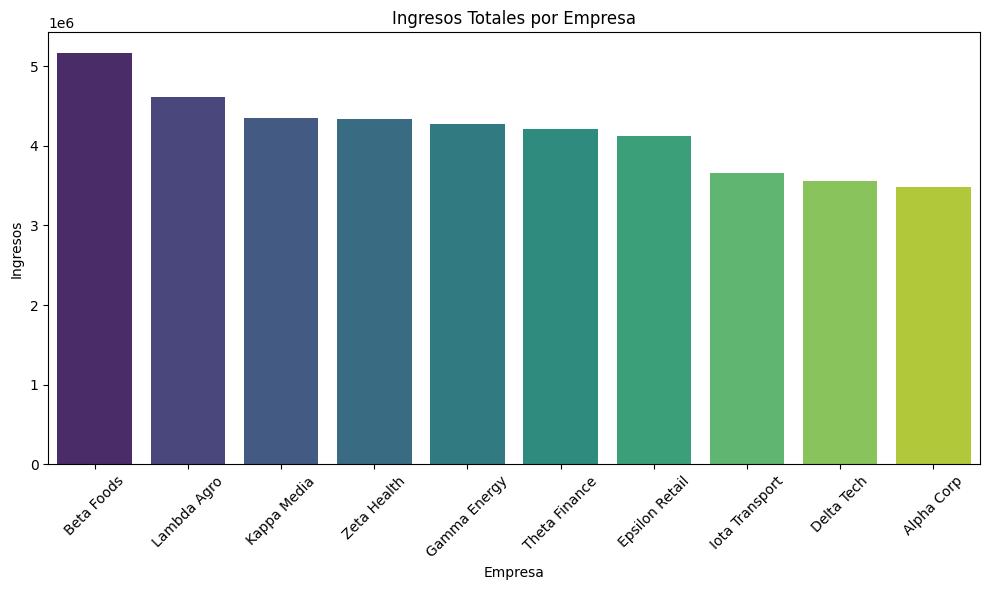

In [73]:
## tabla de ingresos por empresa
ingresos_empresa = df.groupby('Empresa')['Ingresos'].sum().reset_index()
ingresos_empresa = ingresos_empresa.sort_values(by='Ingresos', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=ingresos_empresa, x='Empresa', y='Ingresos', palette='viridis')
plt.title('Ingresos Totales por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## COMPARATIVOS DE EBITDA

/var/folders/cc/f3kjh4c13ws4rgqrwyqr5sgh0000gn/T/ipykernel_14337/4201506206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ebitda_empresa, x='Empresa', y='EBITDA', palette='magma')


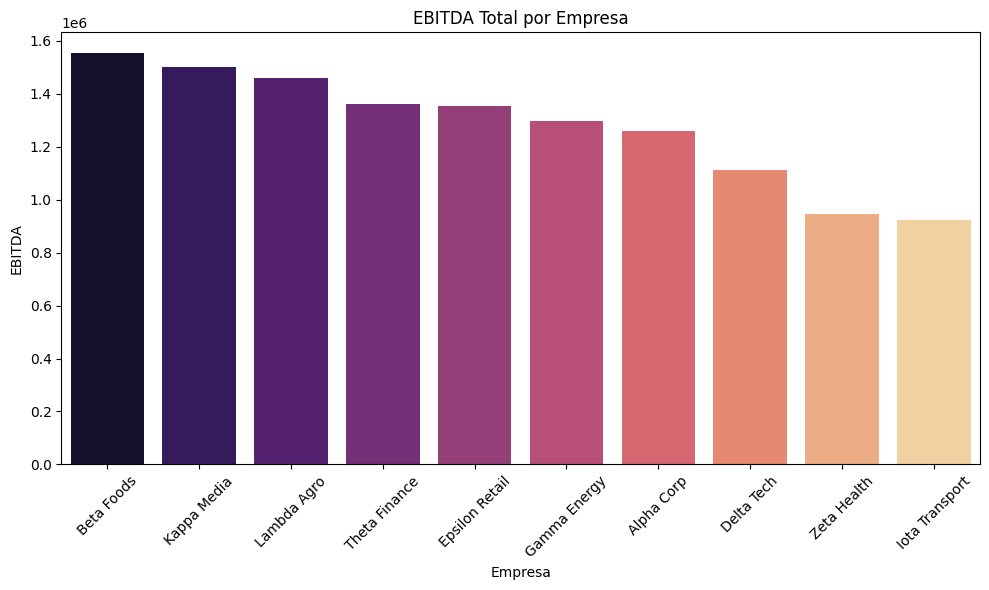

In [74]:
# grafica de EBITDA por empresa
ebitda_empresa = df.groupby('Empresa')['EBITDA'].sum().reset_index()
ebitda_empresa = ebitda_empresa.sort_values(by='EBITDA', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=ebitda_empresa, x='Empresa', y='EBITDA', palette='magma')
plt.title('EBITDA Total por Empresa')
plt.xlabel('Empresa')
plt.ylabel('EBITDA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## DISTRIBUCIONES DE RIESGO

/var/folders/cc/f3kjh4c13ws4rgqrwyqr5sgh0000gn/T/ipykernel_14337/2062536976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_riesgo, x='Rating', order=df_riesgo['Rating'].value_counts().index, palette='Set2')


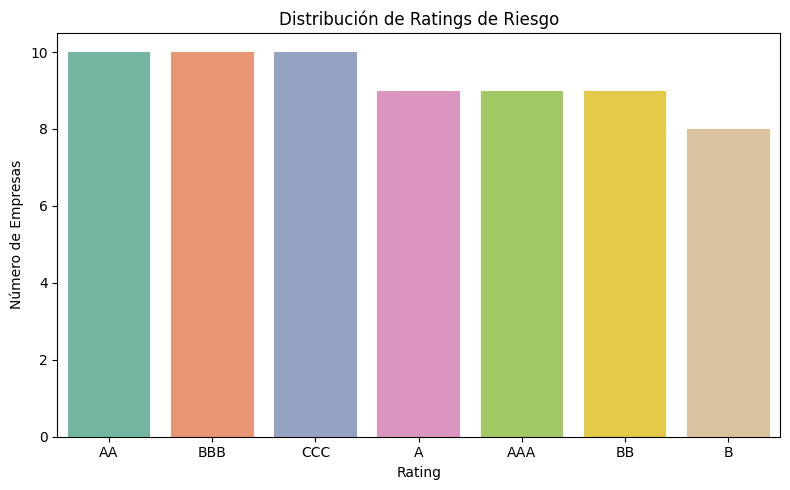

In [75]:
## grafica de riesgo por empresa
plt.figure(figsize=(8, 5))
sns.countplot(data=df_riesgo, x='Rating', order=df_riesgo['Rating'].value_counts().index, palette='Set2')
plt.title('Distribución de Ratings de Riesgo')
plt.xlabel('Rating')
plt.ylabel('Número de Empresas')
plt.tight_layout()
plt.show()

---

# 📊 Conclusión del Análisis Financiero

**✨ Preparación y Limpieza de Datos**
- Carga y limpieza de datos financieros.
- Eliminación de valores nulos y transformaciones para asegurar calidad.

**📈 Análisis Descriptivo**
- Cálculo de ingresos, costos, márgenes y rentabilidad.
- Identificación de empresas con alto desempeño y áreas de mejora.

**⏳ Tendencias Temporales**
- Evolución de ingresos y beneficios a lo largo del tiempo.
- Permite visualizar el desempeño histórico de cada empresa.

**🤝 Comparación entre Empresas**
- Comparación de métricas clave para identificar líderes del sector.
- Comprensión de la posición competitiva de cada empresa.

**📊 Visualizaciones**
- Gráficos que facilitan la interpretación de datos y resultados.

**💡 Conclusiones y Recomendaciones**
- Visión integral de la salud financiera de las empresas.
- Estrategias sugeridas para mejorar el rendimiento financiero.
